<a href="https://colab.research.google.com/github/kylepayne0110/king-county-housing-regression/blob/main/Stats2_Regression_Project_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project One: Multiple Regression, Qualitative Variables Interactions, Quadratic Regression
For Project One, you have been asked to create different regression models analyzing a housing data set. Before beginning work on the project, be sure to read through the Project One Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project One Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.

Scenario
You are a data analyst working for a real estate company. You have access to a large set of historical data that you can use to analyze relationships between different attributes of a house (such as square footage or the number of bathrooms) and the house’s selling price. You have been asked to create different regression models to predict sale prices for houses based on critical variable factors. These regression models will help your company set better prices when listing a home for a client. Setting better prices will ensure that listings can be sold within a reasonable amount of time.

There are several variables in this data set, but you will be working with the following important variables:

Variable - What does it represent?

price - Sale price of the home

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Size of the living area in sqft

sqft_above - Size of the upper level in sqft

sqft_lot - Size of the lot in sqft

age - Age of the home

grade - Measure of craftsmanship and the quality of materials used to build the home

appliance_age - Average age of all appliances in the home

crime - Crime rate per 100,000 people

backyard - Home has a backyard (backyard=1) or not (backyard=0)

school_rating - Average rating of schools in the area

view - Home backs out to a lake (view=2), backs out to trees (view=1), or backs out to a road (view=0)


Prepare Your Data Set
In the following code block, you have been given the R code to prepare your data set.

Click the Run button on the toolbar to run this code.

In [ ]:
housing <- read.csv(file="housing_v2.csv", header=TRUE, sep=",")

# converting appropriate variables to factors
housing <- within(housing, {
   view <- factor(view)
   backyard <- factor(backyard)
})

#view 6 rows of the housing dataframe
head(housing, 6)

# number of columns
ncol(housing)

# number of rows
nrow(housing)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,backyard,view,condition,⋯,yr_built,yr_renovated,renovated,zipcode,sqft_living15,sqft_lot15,age,appliance_age,crime,school_rating
,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,1,325000,3,2.25,1570,43350,1.0,0,2,4,⋯,1967,0,0,98022,1570,220849,48,17.7,138,5.27
2,2,745000,5,3.00,2400,10126,2.0,0,2,3,⋯,1981,0,0,98126,2250,3946,34,3.2,101,9.14
3,3,571000,4,1.00,1350,4000,1.5,0,0,3,⋯,1930,0,0,98117,1520,4000,85,7.6,110,7.97
4,4,395000,2,2.00,1960,4018,1.0,0,0,5,⋯,1950,0,0,98108,1240,4641,65,13.0,118,6.52
5,5,449950,3,1.75,1470,7590,1.0,0,0,3,⋯,1988,0,0,98117,1700,5080,27,6.8,98,8.18
6,6,243000,3,1.75,1450,12125,1.0,0,0,4,⋯,1981,0,0,98001,1210,12125,34,14.1,209,6.23


[1] 23

[1] 2692

Model #1 - First Order Regression Model with Quantitative and Qualitative Variables
You have been asked to create a first order regression model for price as the response variable, and sqft_living, sqft_above, age, bathrooms, and view as predictor variables. Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your first order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

Note: Use the + (plus) button to add new code blocks, if needed.

In [ ]:
myvars <- c("price", "sqft_living", "age")
housing_subset1 <- housing[myvars]

head(housing_subset1, 6)

,price,sqft_living,age
,<int>,<int>,<int>
1,325000,1570,48
2,745000,2400,34
3,571000,1350,85
4,395000,1960,65
5,449950,1470,27
6,243000,1450,34


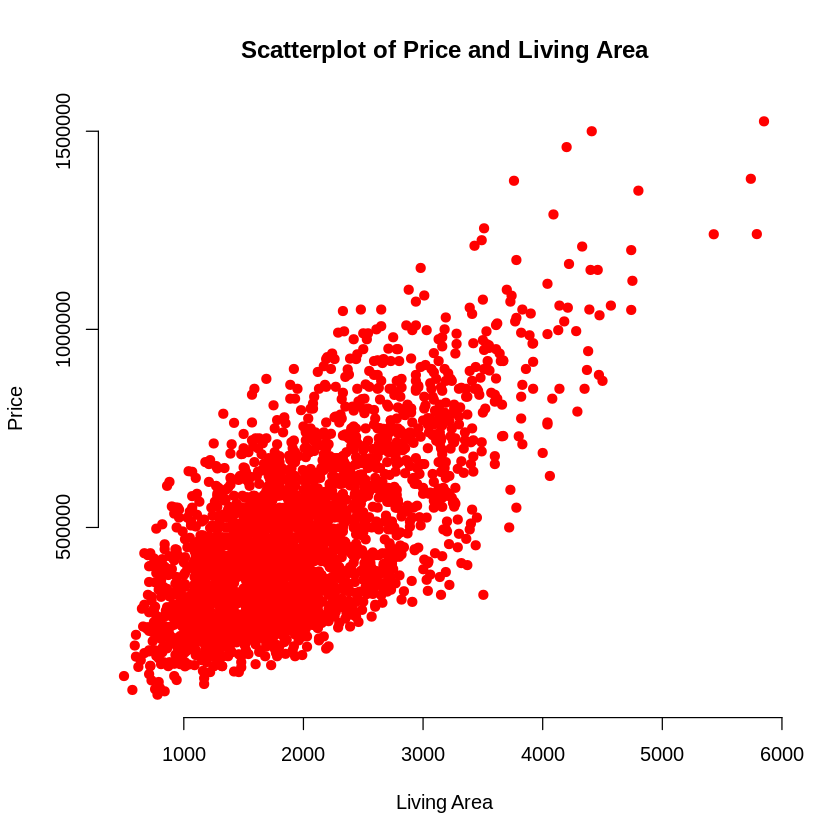

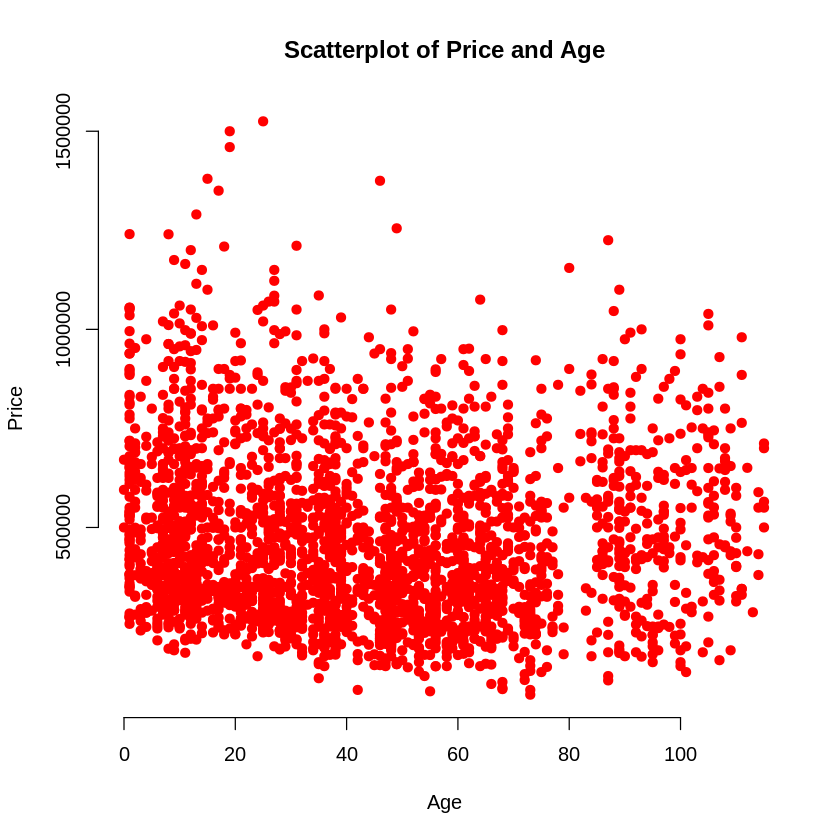

In [ ]:
plot(housing_subset1$sqft_living, housing_subset1$price,
      main="Scatterplot of Price and Living Area",
      xlab="Living Area", ylab="Price",
      col="red",
      pch = 19, frame = FALSE)

plot(housing_subset1$age, housing_subset1$price,
      main="Scatterplot of Price and Age",
      xlab = "Age", ylab = "Price",
      col="red",
      pch = 19, frame = FALSE)

In [ ]:
coor_matrix1 <- cor(housing_subset1, method = "pearson")
round(coor_matrix1, 4)

,price,sqft_living,age
price,1.0000,0.6895,-0.0746
sqft_living,0.6895,1.0000,-0.3547
age,-0.0746,-0.3547,1.0000


In [ ]:
model1 <- lm(price ~ sqft_living + sqft_above + age + bathrooms + view, data=housing)
summary(model1)


Call:
lm(formula = price ~ sqft_living + sqft_above + age + bathrooms + 
    view, data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-419299 -101792   -5606   93896  489323 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.709e+03  1.411e+04   0.546  0.58495    
sqft_living 1.293e+02  8.123e+00  15.916  < 2e-16 ***
sqft_above  1.951e+01  7.458e+00   2.616  0.00894 ** 
age         1.451e+03  1.199e+02  12.098  < 2e-16 ***
bathrooms   4.397e+04  6.126e+03   7.178 9.13e-13 ***
view1       1.675e+05  1.071e+04  15.640  < 2e-16 ***
view2       2.490e+05  1.201e+04  20.739  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 133600 on 2685 degrees of freedom
Multiple R-squared:  0.6029,	Adjusted R-squared:  0.602 
F-statistic: 679.3 on 6 and 2685 DF,  p-value: < 2.2e-16


In [ ]:
#fitted values
print("fitted")
fitted_values1 <- fitted.values(model1)
head(fitted_values1, 10)

#residuals
print("residuals")
residuals1 <- residuals(model1)
head(residuals1, 10)

[1] "fitted"


1        2        3        4        5        6        7        8 
658920.0 795090.2 375857.1 462459.0 342554.5 349732.9 276395.1 830890.8 
       9       10 
416745.2 656704.5

[1] "residuals"


1          2          3          4          5          6          7 
-333919.97  -50090.15  195142.94  -67458.99  107395.51 -106732.87  -56445.15 
         8          9         10 
 -31890.85 -209745.23   93295.48

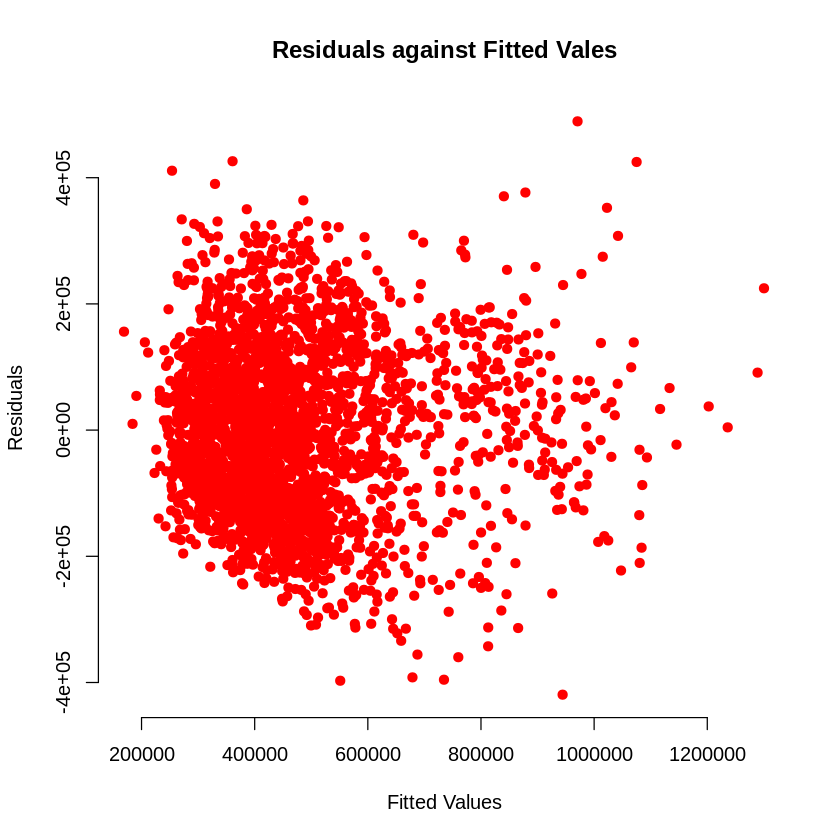

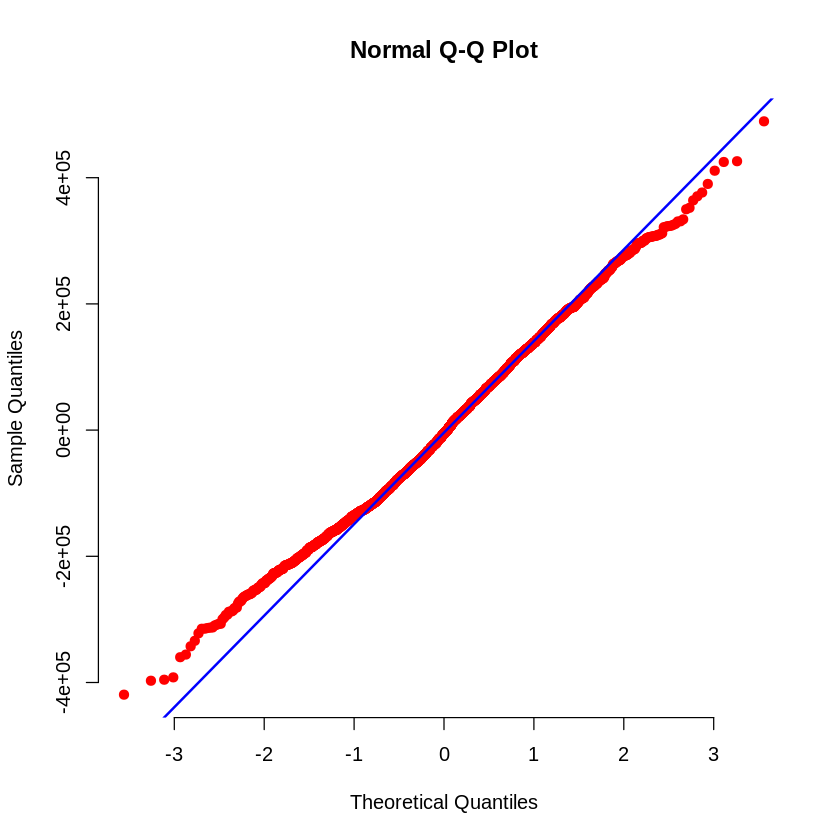

In [ ]:
plot(fitted_values1, residuals1,
      main="Residuals against Fitted Vales",
      xlab = "Fitted Values", ylab = "Residuals",
      col="red",
      pch = 19, frame = FALSE)

qqnorm(residuals1, pch = 19, col="red", frame=FALSE)
qqline(residuals1, col="blue", lwd=2)


In [ ]:
#create new dataframe with specific data
newdata1 <- data.frame(sqft_living=2150, sqft_above=1050, age=15, bathrooms=3, view='0')

print("prediction interval")
prediction_pred_int1 <- predict(model1, newdata1, interval="predict", level=0.90)
round(prediction_pred_int1)

print("confidence interval")
prediction_conf_int1 <- predict(model1, newdata1, interval="confidence", level=0.90)
round(prediction_conf_int1)



[1] "prediction interval"


,fit,lwr,upr
1,459828,239563,680093


[1] "confidence interval"


,fit,lwr,upr
1,459828,446088,473569


Model #2 - Complete Second Order Regression Model with Quantitative Variables
You have been asked to create a complete second order regression model for price as the response variable, and school_rating and crime as predictor variables. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your complete second order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

Note: Use the + (plus) button to add new code blocks, if needed.

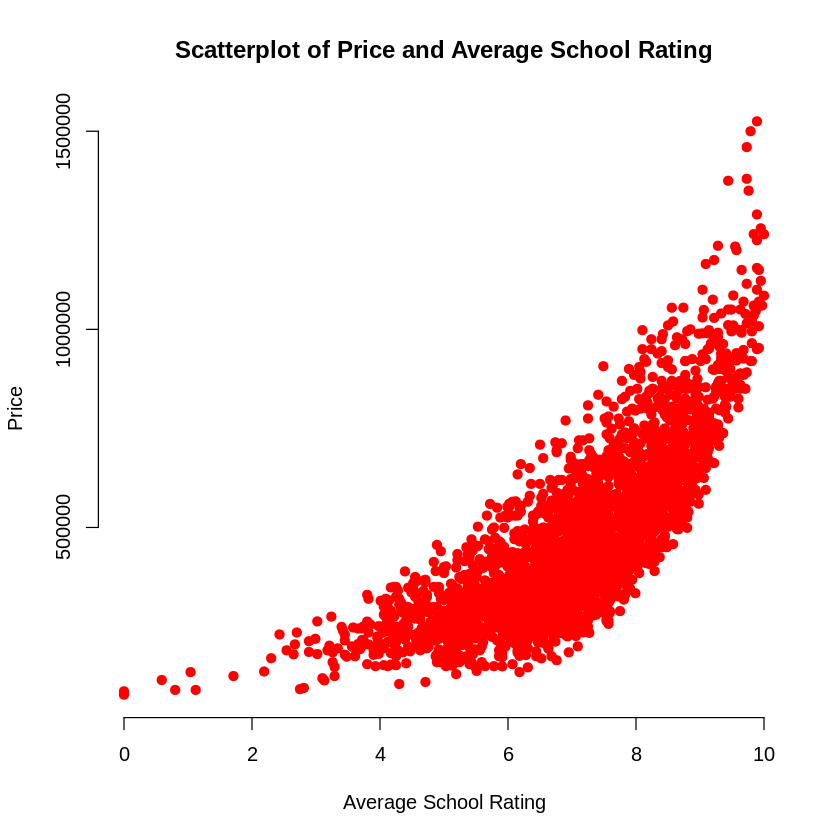

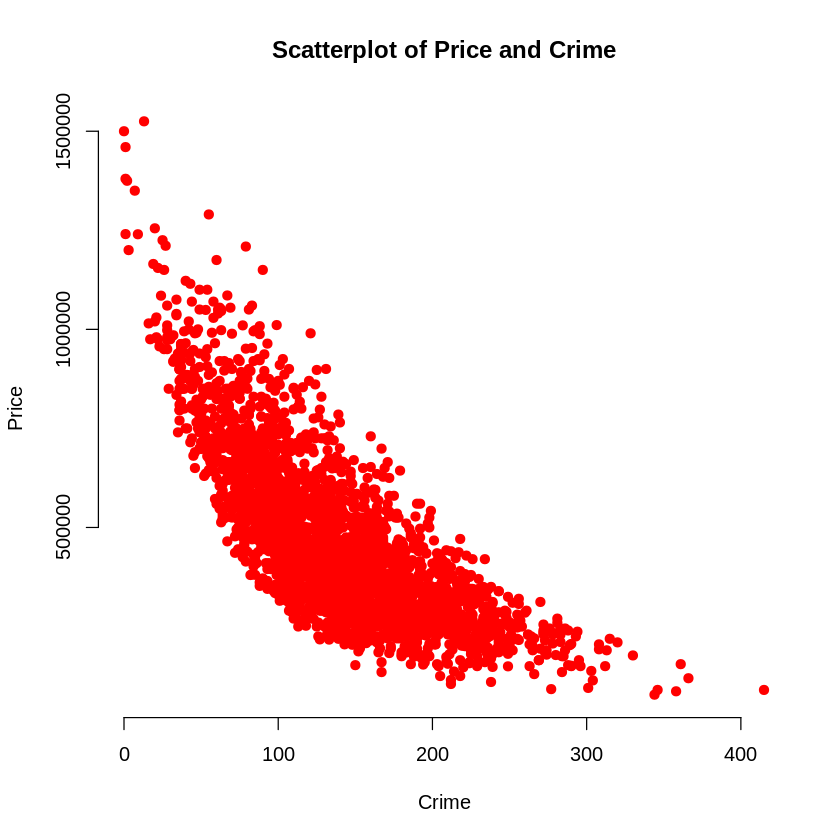

In [ ]:
#scatter plots

plot(housing$school_rating, housing$price,
      main="Scatterplot of Price and Average School Rating",
      xlab="Average School Rating", ylab="Price",
      col="red",
      pch = 19, frame = FALSE)

plot(housing$crime, housing$price,
      main="Scatterplot of Price and Crime",
      xlab="Crime", ylab="Price",
      col="red",
      pch = 19, frame=FALSE)

In [ ]:
#create model
model2 = lm(price ~ school_rating + crime + school_rating:crime + I(school_rating^2)+I(crime^2), data=housing)
summary(model2)


Call:
lm(formula = price ~ school_rating + crime + school_rating:crime + 
    I(school_rating^2) + I(crime^2), data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-340729  -61055   -6288   56875  427915 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.339e+05  1.032e+05   7.113 1.45e-12 ***
school_rating       -7.375e+04  2.083e+04  -3.541 0.000406 ***
crime               -3.155e+03  5.235e+02  -6.027 1.90e-09 ***
I(school_rating^2)   1.165e+04  1.109e+03  10.497  < 2e-16 ***
I(crime^2)           6.377e+00  7.265e-01   8.777  < 2e-16 ***
school_rating:crime -5.227e+01  4.853e+01  -1.077 0.281513    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92690 on 2686 degrees of freedom
Multiple R-squared:  0.8088,	Adjusted R-squared:  0.8084 
F-statistic:  2272 on 5 and 2686 DF,  p-value: < 2.2e-16


In [ ]:
newdata2 <- data.frame(school_rating=9.80, crime=81.02)

#predictions for specific variables

prediction_pred_int2 <- predict(model2, newdata2, interval="predict", level=0.90)
round(prediction_pred_int2)

prediction_conf_int2 <- predict(model2, newdata2, interval="confidence", level=0.90)
round(prediction_conf_int2)

,fit,lwr,upr
1,874497,721606.2,1027388


,fit,lwr,upr
1,874497,863681,885313


Nested Models F-Test
You have been asked to create a reduced model and compare it with the complete second order model (Model #2 above). Before writing any code, review Section 5 of the Summary Report template to see the questions you will need to answer.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

Note: Use the + (plus) button to add new code blocks, if needed.

In [ ]:
#create model 3

model3 <- lm(price ~ school_rating + crime + school_rating:crime, data=housing)
summary(model3)

anova(model2, model3)


Call:
lm(formula = price ~ school_rating + crime + school_rating:crime, 
    data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-336984  -63754   -4397   58894  440377 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -410233.37   25261.25  -16.24   <2e-16 ***
school_rating        155559.97    3133.06   49.65   <2e-16 ***
crime                  2230.07     129.70   17.20   <2e-16 ***
school_rating:crime    -564.85      17.86  -31.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94870 on 2688 degrees of freedom
Multiple R-squared:  0.7995,	Adjusted R-squared:  0.7993 
F-statistic:  3573 on 3 and 2688 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2686,2.307469e+13,NA,NA,NA,NA
2,2688,2.419501e+13,-2,-1.120319e+12,65.20513,2.22716e-28
